## Homework

### Lesson 7

In [17]:
%matplotlib inline

import pandas as pd
bl2018 = pd.read_csv("../../Biggest Loser 2018.csv")

,Total Steps
Team Name,
Stop when you drop!!,291571.0
TBD,259749.0
Tears for Beers,249173.0
"11,111 to No. 1",222513.0
FuFu,214674.0
Scrambled Legs,208666.0
The Slimsons,183239.0
Just Step It,177603.0
Here come the hotsteppers,174767.0


#### Bar Chart
1. Create vertical bar chart with the team_name category for Saturday only.

In [18]:
#Get the date columns
date_col = list(bl2018.columns.values)[4:] #Get the column name for date only (starting from 4th column)

#Transpose the date column into row, add the team_name column as well
bardf = pd.melt(bl2018, id_vars="team_name", value_vars=date_col, var_name="Date", value_name="Total Steps")

#Rename the team_name column into Team Name
bardf = bardf.rename(columns={'team_name': 'Team Name'})

#Convert the Date column into datetime format
bardf["Date"] = pd.to_datetime(bardf["Date"])

#Get the Day of Week based on the Date column
bardf["Day of Week"] = bardf["Date"].dt.weekday_name

#Filter to Saturday only
bardf = bardf.loc[bardf['Day of Week'] == 'Saturday']

#Group by Team Name column
bardf = bardf.groupby("Team Name").sum()

#Sort into descending order
bardf = bardf.sort_values(by=["Total Steps"], ascending=[False])

bardf

,Total Steps
Team Name,
Stop when you drop!!,291571.0
TBD,259749.0
Tears for Beers,249173.0
"11,111 to No. 1",222513.0
FuFu,214674.0
Scrambled Legs,208666.0
The Slimsons,183239.0
Just Step It,177603.0
Here come the hotsteppers,174767.0


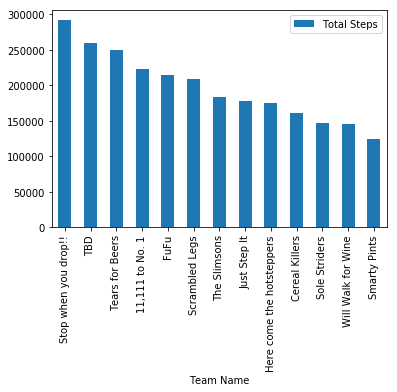

In [19]:
bardf.plot.bar()

2. Create horizontal bar chart using barh() function.

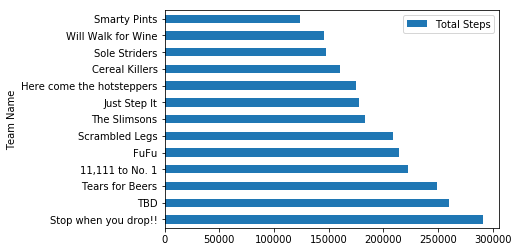

In [20]:
bardf.plot.barh()

#### Histogram
1. Change the number of bins and observe the differences.

In [30]:
#Transpose the date column into row, add the team_name column as well
histdf = pd.melt(bl2018, id_vars="team_name", value_vars=date_col, value_name="Total Steps")

#Rename the team_name column into Team Name
histdf = histdf.rename(columns={'team_name': 'Team Name'})

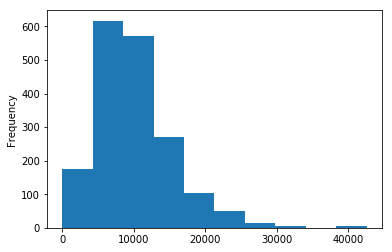

In [31]:
#10 bins
histdf["Total Steps"].plot.hist(bins=10)

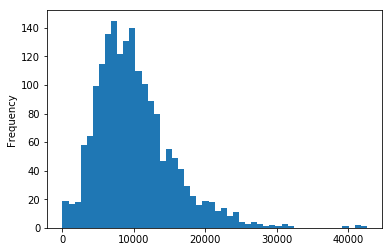

In [32]:
#50 bins
histdf["Total Steps"].plot.hist(bins=50)

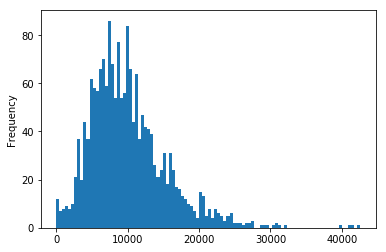

In [33]:
#100 bins
histdf["Total Steps"].plot.hist(bins=100)

2. Create one histogram of any team and compare it with the histogram of the overall groups above.

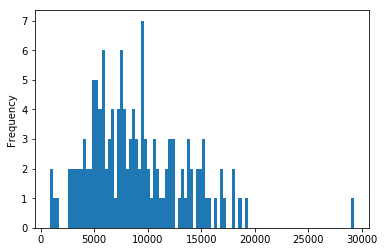

In [36]:
teamhistdf = histdf.loc[histdf['Team Name'] == 'FuFu']
teamhistdf["Total Steps"].plot.hist(bins=100)